Import packages

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
from functools import reduce

Load Competiton, Match, and Event Data from statsbombpy

In [13]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps.query('competition_gender == "female"')

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
25,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
26,37,42,England,FA Women's Super League,female,False,False,2019/2020,2024-02-12T15:05:34.211400,2021-06-13T16:17:31.694,None,2024-02-12T15:05:34.211400
27,37,4,England,FA Women's Super League,female,False,False,2018/2019,2024-06-12T07:41:45.347457,2021-06-13T16:17:31.694,None,2024-06-12T07:41:45.347457
63,49,3,United States of America,NWSL,female,False,False,2018,2023-07-24T13:01:22.094587,2021-06-13T16:17:31.694,None,2023-07-24T13:01:22.094587
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596
73,72,30,International,Women's World Cup,female,False,True,2019,2024-02-13T09:41:26.379767,2021-06-13T16:17:31.694,None,2024-02-13T09:41:26.379767


In [3]:
#selecionando a Eurocopa entre as competicoes

free_comps.query('competition_name == "UEFA Euro"')

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [4]:
# lista de partidas de uma competição específica

euro_2024_matches = sb.matches(competition_id=55, season_id=282)

## Analisando a Holanda

In [5]:
# partidas da holanda

team = "Netherlands"

team_matches = euro_2024_matches.query(f'home_team == "{team}" or away_team == "{team}"')

team_matches = team_matches.sort_values(by='match_date', ascending=False)

In [6]:
team_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
12,3941021,2024-07-02,19:00:00.000,Europe - UEFA Euro,2024,Romania,Netherlands,0,3,available,...,2024-07-12T23:28:27.122555,4,Round of 16,Allianz Arena,Felix Zwayer,Edward Iordănescu,Ronald Koeman,1.1.0,2,2
5,3930180,2024-06-25,19:00:00.000,Europe - UEFA Euro,2024,Netherlands,Austria,2,3,available,...,2024-07-11T13:25:37.289456,3,Group Stage,Olympiastadion Berlin,Ivan Kružliak,Ronald Koeman,Ralf Rangnick,1.1.0,2,2
22,3930173,2024-06-21,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,France,0,0,available,...,2024-07-12T19:39:43.381031,2,Group Stage,Trainingszentrum RB Leipzig Platz 1,Anthony Taylor,Ronald Koeman,Didier Deschamps,1.1.0,2,2
29,3938637,2024-06-16,16:00:00.000,Europe - UEFA Euro,2024,Poland,Netherlands,1,2,available,...,2024-07-12T03:39:53.010211,1,Group Stage,Volksparkstadion,Artur Manuel Ribeiro Soares Dias,Michał Probierz,Ronald Koeman,1.1.0,2,2


In [7]:
# pegando o id da partida mais recente
# interessante criar uma variavel para permitir trocas faceis

latest_match_id = team_matches.match_id.iloc[0]

In [8]:
# chamando statsbombpy eventos API para trazer os dados de eventos da partida especificada

match_events = sb.events(match_id=latest_match_id)

# mostrar todas as colunas de um dataframe
pd.set_option('display.max_columns', None)

# exibindo os 10 primeiros eventos da partida

match_events.head(10)

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e518d7a6-3360-4d94-aeef-661709bddf42,2,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[75fd7777-ef15-4fdc-abb1-1349fef334c1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[fb2e0f15-aa3c-4a06-a11b-f16ae5804342],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c3297388-2725-4802-94e4-fa6e17c06ae2,1698,NaN,NaN,NaN,3942819,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Goal Kick,NaN,NaN,NaN,50,England,768,[3e3599d1-e3fc-41df-a377-c1a833c6e3ec],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3e3599d1-e3fc-41df-a377-c1a833c6e3ec,1699,NaN,NaN,NaN,3942819,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Goal Kick,Na

In [9]:
# lista de colunas no dataframe de eventos da partida
match_events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [10]:
# Separando localização inicial e final a partir das coordenadas
match_events[['x', 'y']] = match_events['location'].apply(pd.Series)
match_events[['pass_end_x', 'pass_end_y']] = match_events['pass_end_location'].apply(pd.Series)
match_events[['carry_end_x', 'carry_end_y']] = match_events['carry_end_location'].apply(pd.Series)

In [11]:
match_events.query('location != "Nan"') #['location']

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e518d7a6-3360-4d94-aeef-661709bddf42,2,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[75fd7777-ef15-4fdc-abb1-1349fef334c1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[fb2e0f15-aa3c-4a06-a11b-f16ae5804342],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c3297388-2725-4802-94e4-fa6e17c06ae2,1698,NaN,NaN,NaN,3942819,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Goal Kick,NaN,NaN,NaN,50,England,768,[3e3599d1-e3fc-41df-a377-c1a833c6e3ec],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [12]:
match_events['location'].dtype

dtype('O')

In [13]:
match_events[(match_events.location != "NaN")]

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e518d7a6-3360-4d94-aeef-661709bddf42,2,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[75fd7777-ef15-4fdc-abb1-1349fef334c1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[fb2e0f15-aa3c-4a06-a11b-f16ae5804342],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c3297388-2725-4802-94e4-fa6e17c06ae2,1698,NaN,NaN,NaN,3942819,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Goal Kick,NaN,NaN,NaN,50,England,768,[3e3599d1-e3fc-41df-a377-c1a833c6e3ec],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Progressões e passes no último terço

In [14]:
match_events.pass_outcome.unique()

array([nan, 'Incomplete', 'Pass Offside', 'Out', 'Unknown'], dtype=object)

#### Filtrando por passes que começaram foram do último terço e terminaram dentro dele. Passes que foram completados

In [15]:
f3rd_passes=match_events[(match_events.team==team)&(match_events.type=="Pass")&(match_events.x<80)&(match_events.pass_end_x>80)&(match_events.pass_outcome.isna())]

f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [16]:
f3rd_passes_count

,player,Passes
0,Jerdy Schouten,3
1,Joey Veerman,5
2,Joshua Zirkzee,1
3,Nathan Aké,1
4,Stefan de Vrij,5
5,Tijjani Reijnders,3
6,Virgil van Dijk,1
7,Xavi Simons,2


#### Agora, as conduções de bola que começaram fora e terminaram dentro do último terço

In [17]:
f3rd_carries=match_events[(match_events.type=="Carry")&(match_events.x<80)&(match_events.carry_end_x>80)&(match_events.team==team)]

f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [18]:
f3rd_carries_count

,player,Carries
0,Cody Mathès Gakpo,2
1,Joey Veerman,2
2,Memphis Depay,1
3,Stefan de Vrij,1
4,Tijjani Reijnders,3
5,Xavi Simons,5


In [19]:
# Passes e conduções no mesmo dataframe
df_passes_carries = pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])
# Preenchendo os valores nulos com 0
df_passes_carries = df_passes_carries.fillna(0)

# Criando uma coluna com a soma dos passes e conduções
df_passes_carries['Total'] = df_passes_carries['Passes'] + df_passes_carries['Carries']


df_passes_carries.sort_values(by='Total', ascending=False, inplace=True)

df_passes_carries

,player,Passes,Carries,Total
9,Xavi Simons,2.0,5.0,7.0
2,Joey Veerman,5.0,2.0,7.0
6,Stefan de Vrij,5.0,1.0,6.0
7,Tijjani Reijnders,3.0,3.0,6.0
1,Jerdy Schouten,3.0,0.0,3.0
0,Cody Mathès Gakpo,0.0,2.0,2.0
5,Nathan Aké,1.0,0.0,1.0
4,Memphis Depay,0.0,1.0,1.0
3,Joshua Zirkzee,1.0,0.0,1.0
8,Virgil van Dijk,1.0,0.0,1.0


## Gráfico de barras

<Figure size 1500x1500 with 0 Axes>

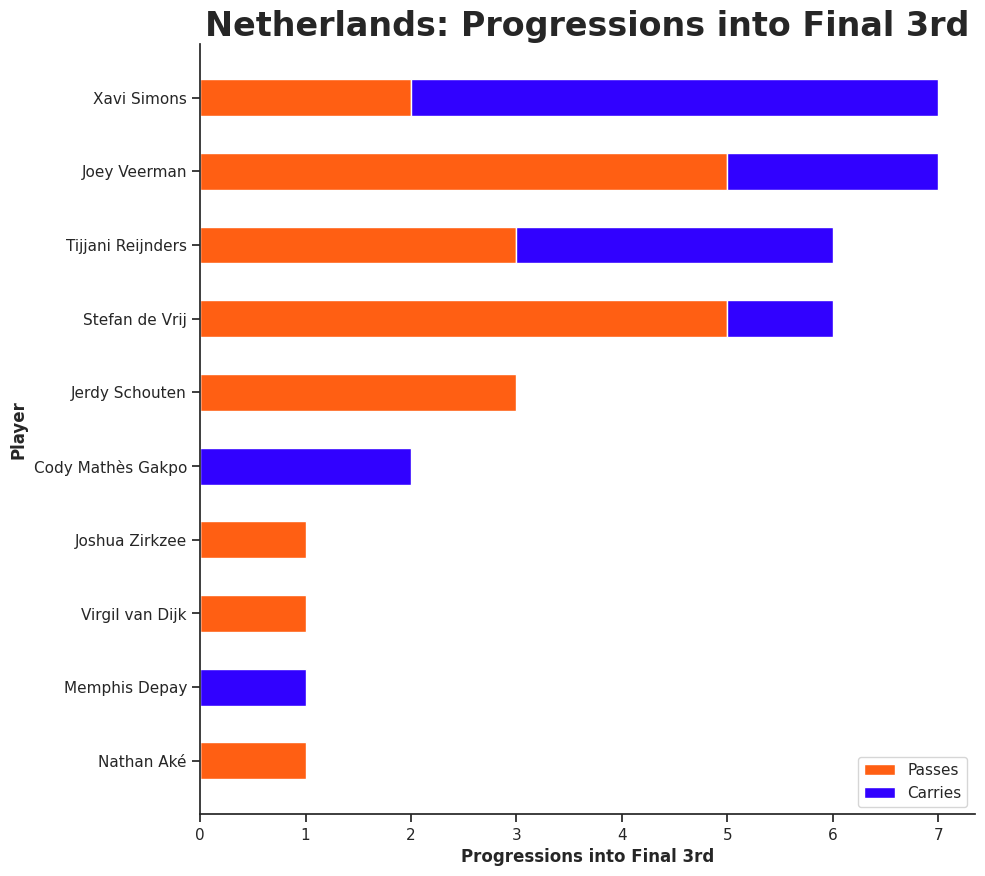

In [20]:
pass_colour='#FF5F13'
carry_colour='#3101FF'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
df_passes_carries.sort_values(by='Total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=df_passes_carries[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

## Campo com passes e conduções de um jogador específico

In [21]:
# nomes dos jogadores
match_events['player'].unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Virgil van Dijk',
       'John Stones', 'Nathan Aké', 'Stefan de Vrij', 'Jerdy Schouten',
       'Denzel Dumfries', 'Marc Guehi', 'Declan Rice', 'Jude Bellingham',
       'Kieran Trippier', 'Phil Foden', 'Kyle Walker', 'Bukayo Saka',
       'Harry Kane', 'Bart Verbruggen', 'Memphis Depay', 'Xavi Simons',
       'Tijjani Reijnders', 'Donyell Malen', 'Cody Mathès Gakpo',
       'Joey Veerman', 'Luke Shaw', 'Wout Weghorst', 'Cole Palmer',
       'Ollie Watkins', 'Joshua Zirkzee', 'Conor Gallagher',
       'Brian Brobbey'], dtype=object)

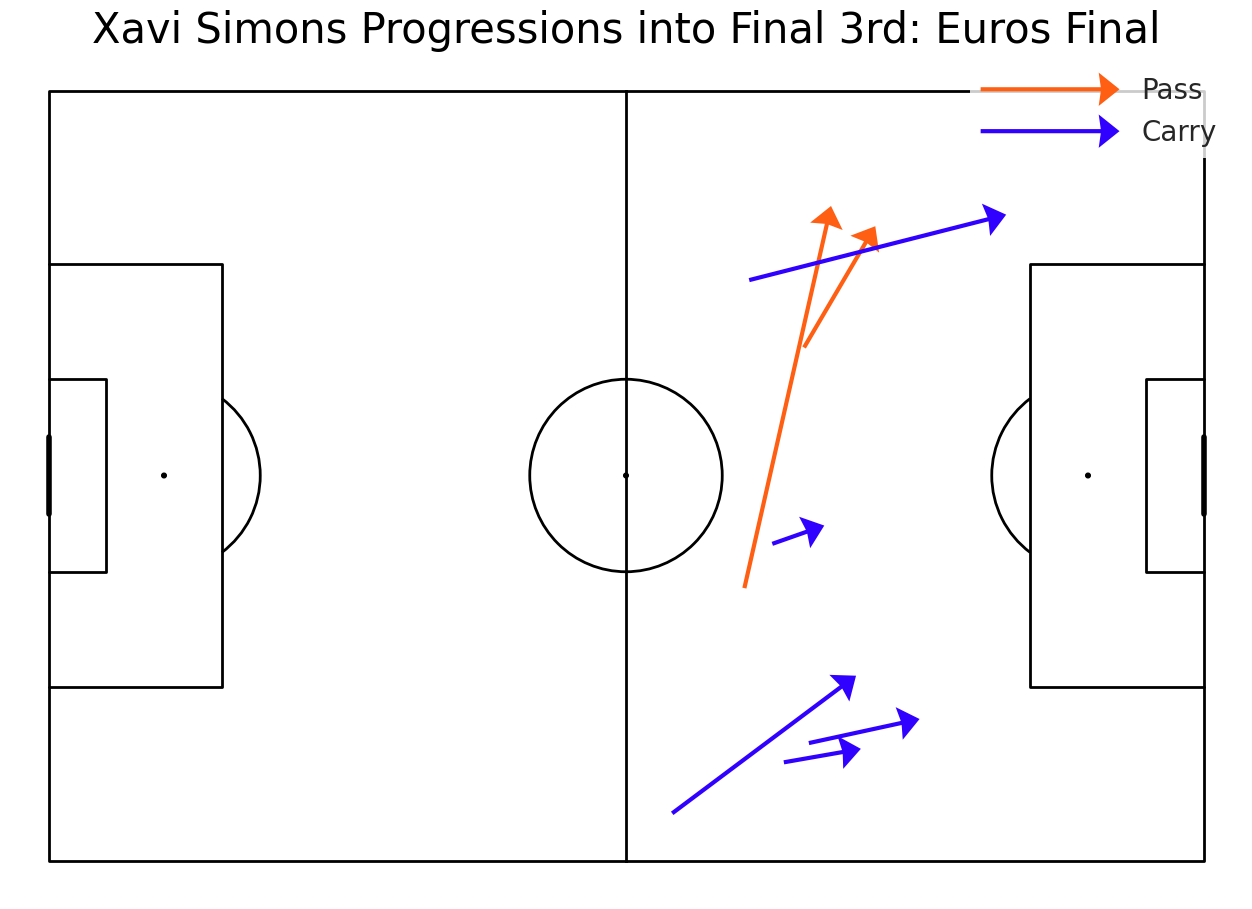

In [22]:
player_name="Xavi Simons"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

# conducoes
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")


ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')

## Ações com bola

In [23]:
player1="Xavi Simons"
player2="Memphis Depay"
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [24]:
 # da coluna 'type', traga os eventos que constam na lista 'touches'
player1_df=match_events[(match_events.player==player1)&(match_events.type.isin(touches))]
player2_df=match_events[(match_events.player==player2)&(match_events.type.isin(touches))]

In [25]:
#criando degradê de cores
colour1="white"
colour2="#EBBC04"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

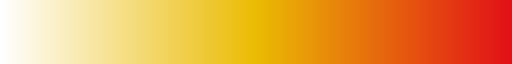

In [26]:
cmap

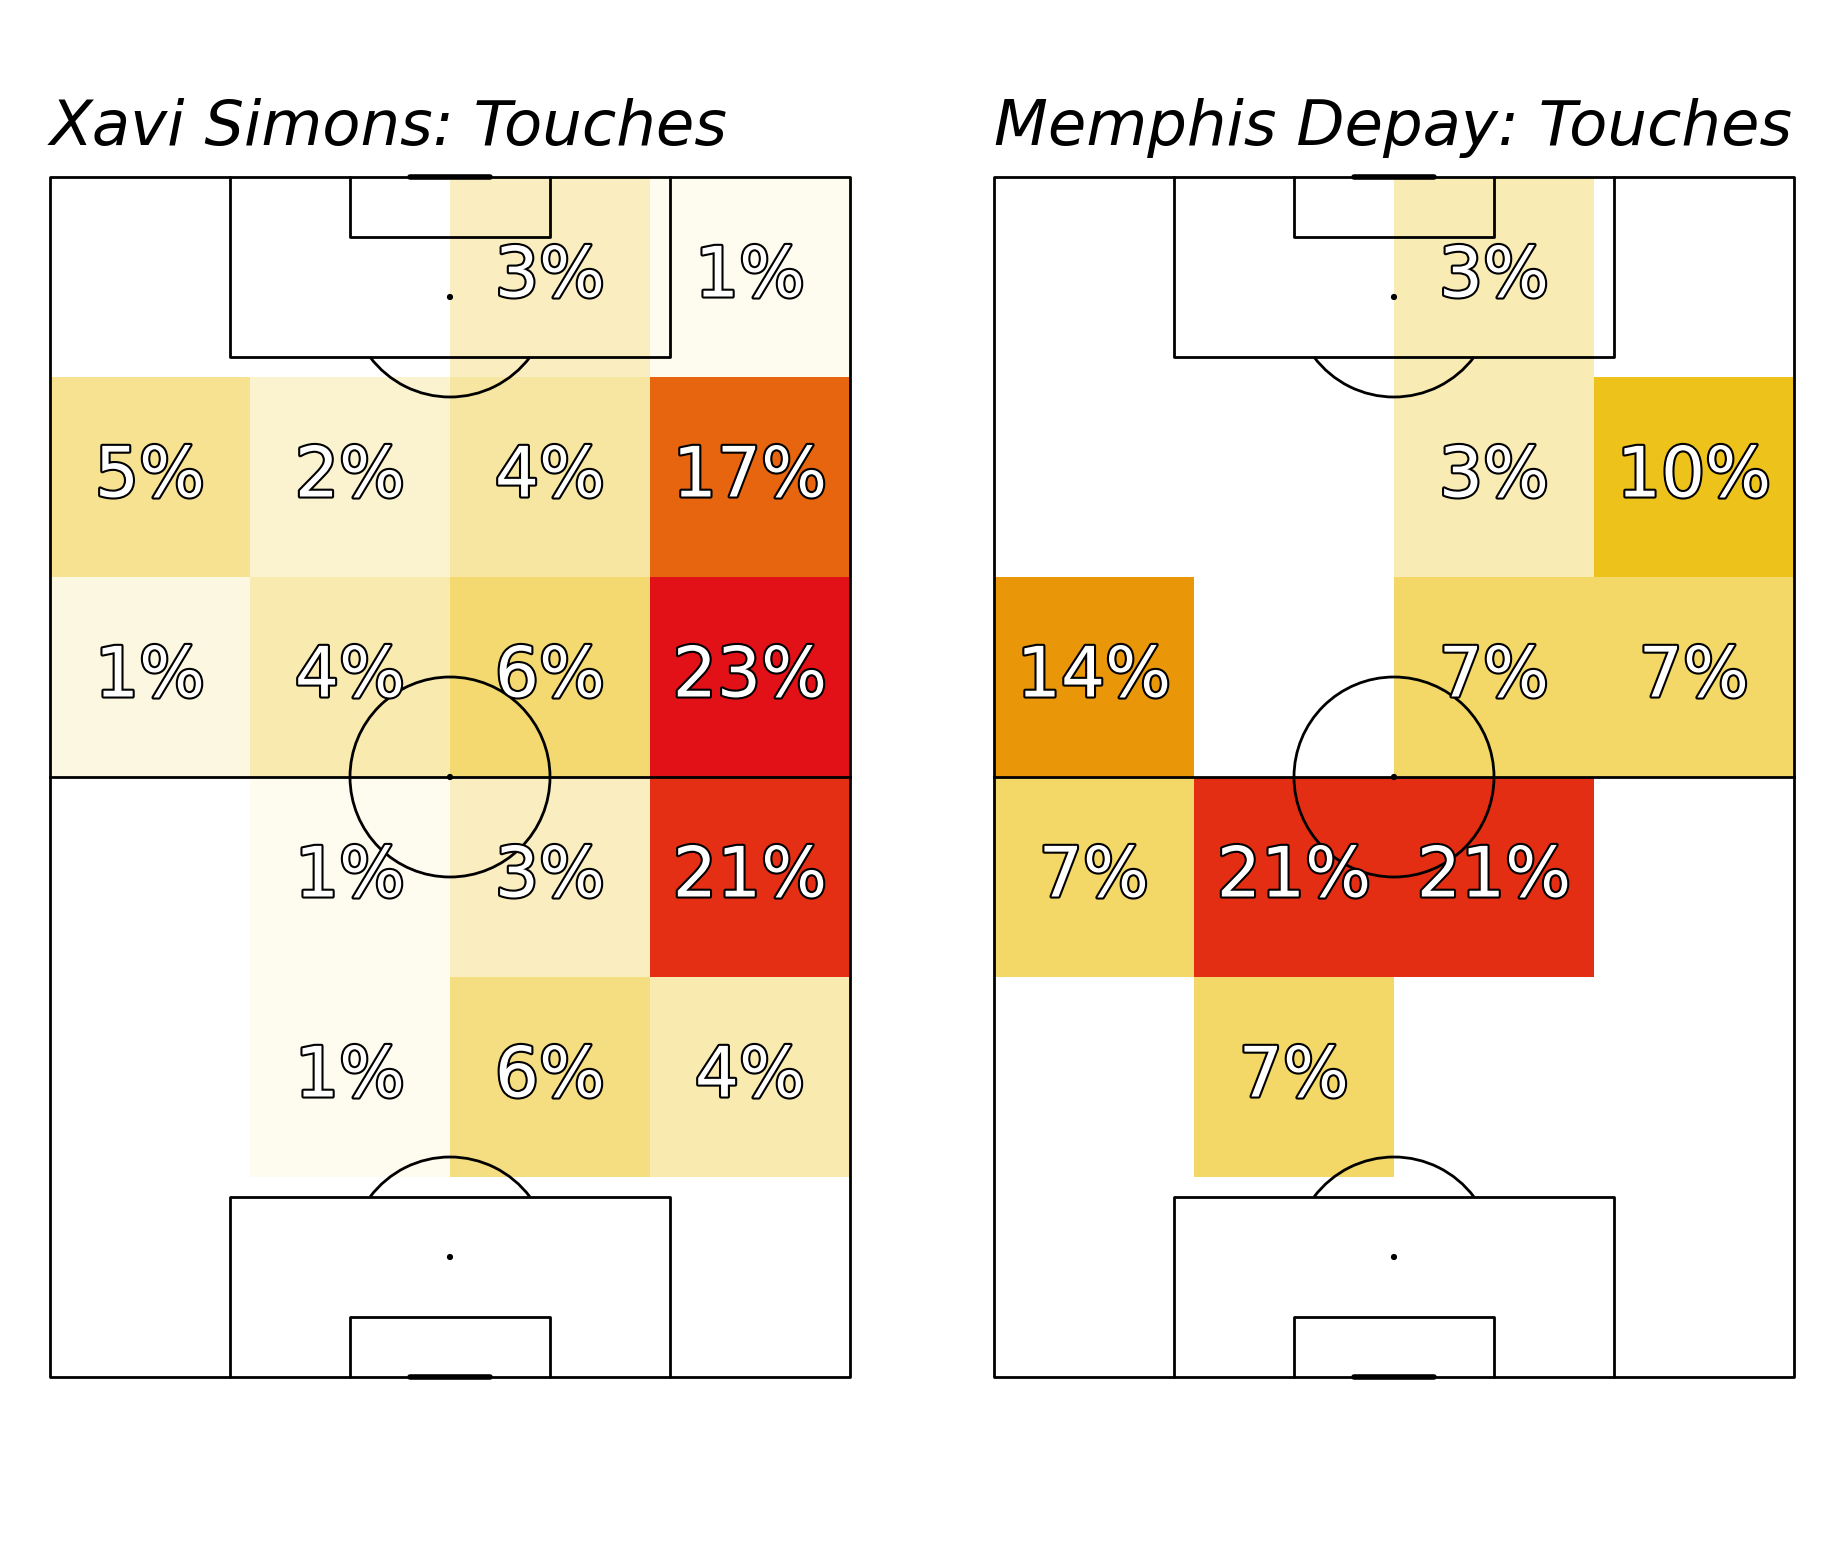

In [27]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

## xG e mapa de chutes durante o torneio

#### Extraindo eventos da Eurocopa inteira

In [28]:
# dados do torneio inteiro
comp_events_df=sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

In [29]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

/tmp/ipykernel_21140/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/tmp/ipykernel_21140/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/tmp/ipykernel_21140/2447140862.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

In [30]:
total_matches = len(comp_events_df['match_id'].unique())
total_events = len(comp_events_df)
events_per_match = total_events / total_matches 
print(f'''
    Total de partidas: {total_matches}
    Total de eventos: {total_events}
    Média de eventos por jogo: {events_per_match:.2f}
      ''')



    Total de partidas: 51
    Total de eventos: 187858
    Média de eventos por jogo: 3683.49
      


#### Chutes e gols

In [31]:
# excluindo pênaltis da conta de chutes e gols

shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")&(comp_events_df.shot_outcome=="Goal")]

# chutes
shots_count=shots_df.groupby(['player','team']).size().reset_index()
shots_count.rename(columns={shots_count.columns[2]: "shots" }, inplace = True)


# gols
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()
goals_count.rename(columns={goals_count.columns[2]: "goals" }, inplace = True)


# xG
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()
xg_sum.rename(columns={xg_sum.columns[2]: "xg" }, inplace = True)
xg_sum['xg']=xg_sum['xg'].round(2)


# combinando dataframes
#shot_stats=pd.merge(shots_count, goals_count,
#                    how="outer", on=["player", "team"]).fillna(0)

#shot_stats=pd.merge(shot_stats, xg_sum,
#                    how="outer", on=["player", "team"]).fillna(0)


In [32]:
goals_count

,player,team,goals
0,Adam Buksa,Poland,1
1,Alessandro Bastoni,Italy,1
2,Andrej Kramarić,Croatia,1
3,Arda Güler,Turkey,1
4,Barnabás Varga,Hungary,1
...,...,...,...
76,Xherdan Shaqiri,Switzerland,1
77,Youri Tielemans,Belgium,1
78,Álvaro Borja Morata Martín,Spain,1
79,İlkay Gündoğan,Germany,1


In [33]:
# usando reduce para combinar chutes, gols e xG ao mesmo tempo

dfs_list = [shots_count, goals_count,xg_sum]

def merge_dfs(left, right):
    return pd.merge(left, right, on=["player", "team"], how = 'outer').fillna(0)

shot_stats = reduce(merge_dfs, dfs_list)
shot_stats['goals'] = shot_stats['goals'].astype('int32')

In [34]:
shot_stats.sort_values(by='goals', ascending=False, inplace=True)

In [35]:
#Shot map for top scorer
xg_player=shot_stats.player.iloc[0]

player_goals_df=goals_df[(goals_df.player==xg_player)]

player_shots_df=shots_df[(shots_df.player==xg_player)&(shots_df.shot_outcome!="Goal")]

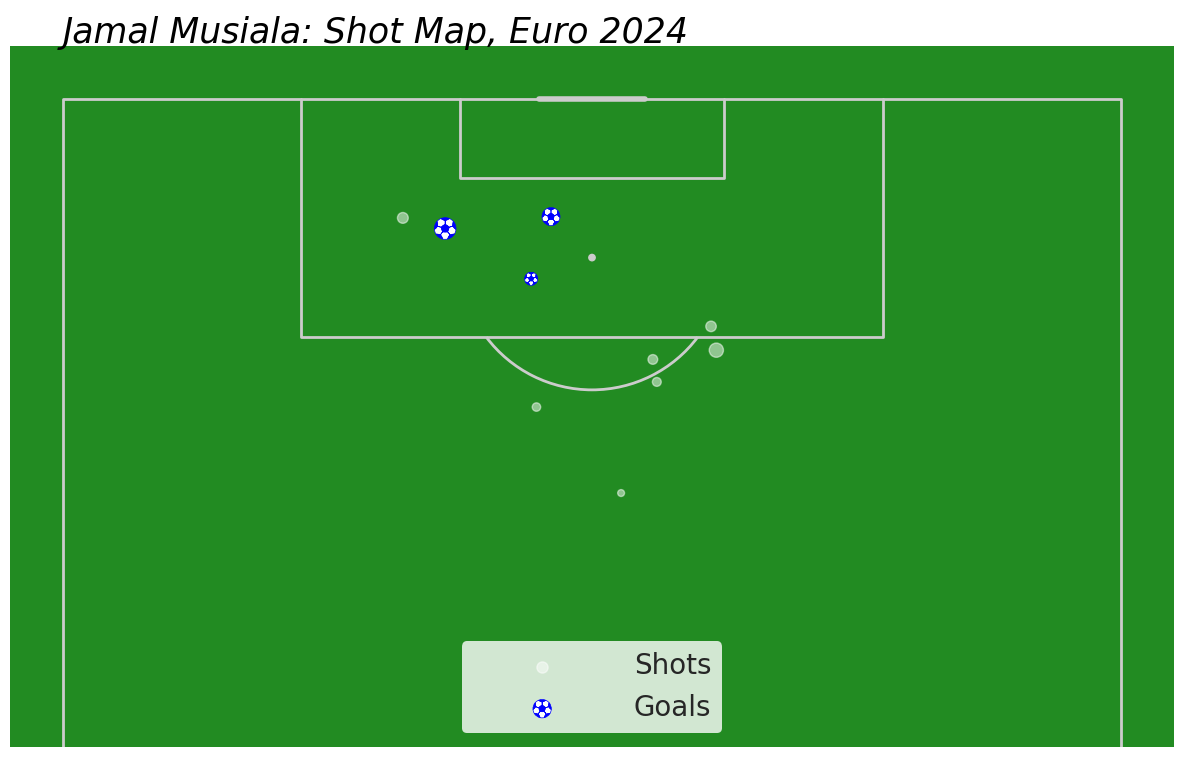

In [36]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11, pitch_color='forestgreen')
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='white'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{xg_player}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')

## Recepção de passes

In [37]:
 # da coluna 'type', traga os eventos que constam na lista 'touches'

events_types = ['Ball Receipt*']
player = 'Tijjani Reijnders'

player_ball_rec=match_events[(match_events.player==player)&(match_events.type.isin(events_types))]


In [38]:
match_events['player'].unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Virgil van Dijk',
       'John Stones', 'Nathan Aké', 'Stefan de Vrij', 'Jerdy Schouten',
       'Denzel Dumfries', 'Marc Guehi', 'Declan Rice', 'Jude Bellingham',
       'Kieran Trippier', 'Phil Foden', 'Kyle Walker', 'Bukayo Saka',
       'Harry Kane', 'Bart Verbruggen', 'Memphis Depay', 'Xavi Simons',
       'Tijjani Reijnders', 'Donyell Malen', 'Cody Mathès Gakpo',
       'Joey Veerman', 'Luke Shaw', 'Wout Weghorst', 'Cole Palmer',
       'Ollie Watkins', 'Joshua Zirkzee', 'Conor Gallagher',
       'Brian Brobbey'], dtype=object)

In [39]:
player_ball_rec.head(2)

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e60e7a24-2285-41da-a637-a086c7e74385,262,NaN,NaN,"[45.3, 11.1]",3942819,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Tijjani Reijnders,21582.0,Left Defensive Midfield,9,Netherlands,941,[fb85c7c0-2189-4f1a-b106-0c138920daf3],29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:05:29.901,Ball Receipt*,NaN,45.3,11.1,NaN,NaN,NaN,NaN
1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a7243742-ea26-4771-85b4-b980ceb8cad0,528,NaN,NaN,"[56.8, 9.9]",3942819,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Tijjani Reijnders,21582.0,Left Defensive Midfield,22,Netherlands,941,[4243e60f-6ca1-46b2-95e4-565bd05dea20],25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:19:25.595,Ball Receipt*,NaN,56.8,9.9,NaN,NaN,NaN,NaN


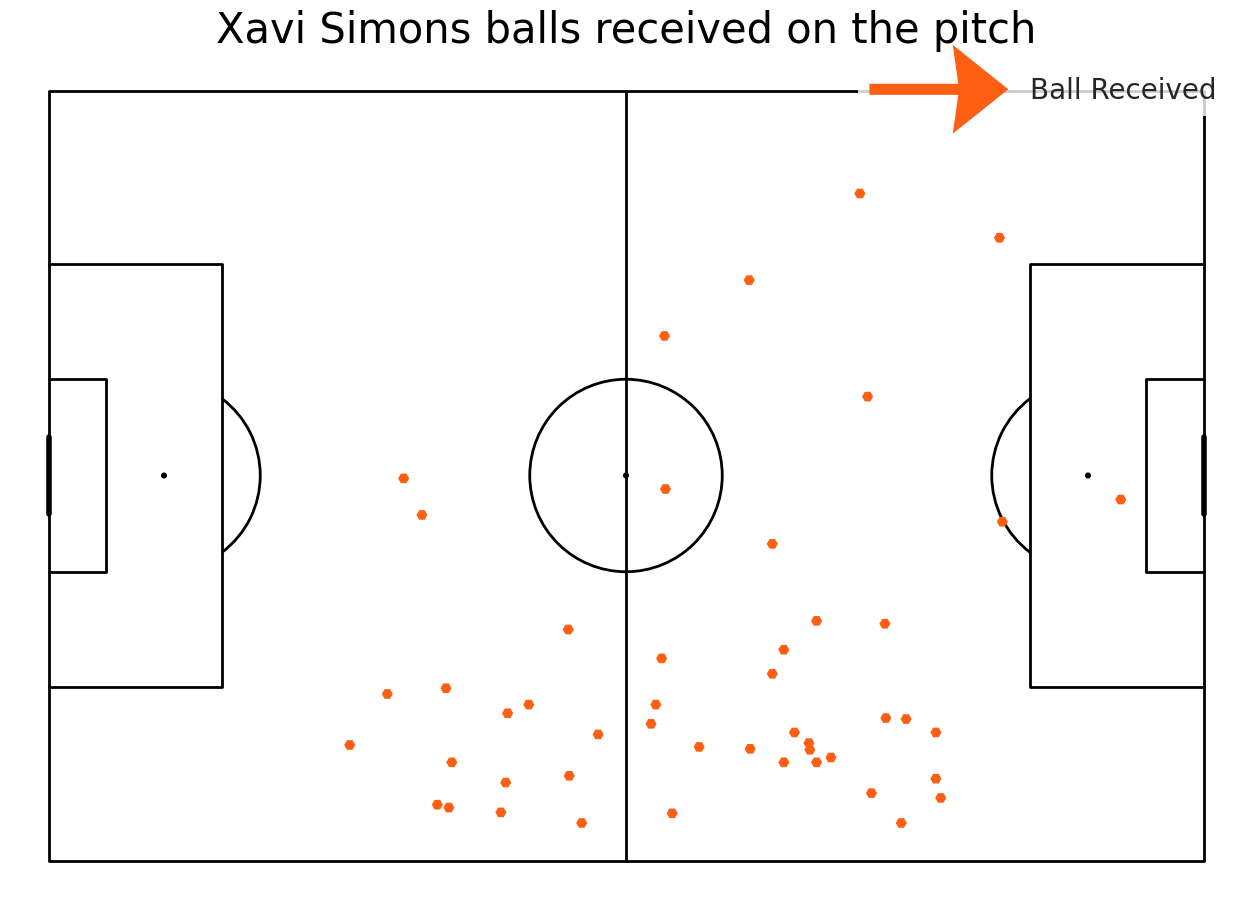

In [40]:
player_name="Xavi Simons"
events_types = ['Ball Receipt*']
player_ball_rec=match_events[(match_events.player==player_name)&(match_events.type.isin(events_types))]

# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# bolas recebidas
pitch.arrows(player_ball_rec.x, player_ball_rec.y,
             player_ball_rec.x, player_ball_rec.y,
width=8,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Ball Received")




ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} balls received on the pitch', fontsize=30,color='black')

In [41]:
print(len(player_ball_rec))

48


# Principais métricas de um jogador específico

In [43]:
match_events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Block', 'Interception',
       'Duel', 'Goal Keeper', 'Clearance', 'Dispossessed', 'Shot',
       'Injury Stoppage', 'Player Off', 'Player On', 'Referee Ball-Drop',
       '50/50', 'Substitution', 'Tactical Shift', 'Half End',
       'Bad Behaviour'], dtype=object)

In [46]:
match_events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [47]:
euro_2024_matches = sb.matches(competition_id=55, season_id=282)


In [51]:
df_test = sb.player_match_stats(match_id=3942819)

Exception: There is currently no open data for aggregated stats, please provide credentials

In [50]:
df_test

<function statsbombpy.sb.player_match_stats(match_id: int, fmt: str = 'dataframe', creds: dict = {'user': None, 'passwd': None}) -> Union[pandas.core.frame.DataFrame, dict]>

In [48]:
euro_2024_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,available,2024-07-10T08:51:07.032303,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,available,2024-07-10T06:50:04.068615,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,available,2024-07-12T01:57:15.210934,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2
5,3930180,2024-06-25,19:00:00.000,Europe - UEFA Euro,2024,Netherlands,Austria,2,3,available,available,2024-07-11T13:24:55.422159,2024-07-11T13:25:37.289456,3,Group Stage,Olympiastadion Berlin,Ivan Kružliak,Ronald Koeman,Ralf Rangnick,1.1.0,2,2
6,3930171,2024-06-20,19:00:00.000,Europe - UEFA Euro,2024,Denmark,England,1,1,available,available,2024-07-12T05:16:00.445930,2024-07-12T05:19:44.572914,2,Group Stage,Deutsche Bank Park,Artur Manuel Ribeiro Soares Dias,Kasper Hjulmand,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,available,2024-07-14T15:55:52.682165,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
8,3942226,2024-07-05,19:00:00.000,Europe - UEFA Euro,2024,Spain,Germany,2,1,available,available,2024-07-13T03:52:05.176875,2024-07-13T03:52:43.383929,5,Quarter-finals,MHPArena,Anthony Taylor,Luis de la Fuente Castillo,Julian Nagelsmann,1.1.0,2,2
9,3938645,2024-06-26,19:00:00.000,Europe - UEFA Euro,2024,Ukraine,Belgium,0,0,available,available,2024-07-11T16:13:10.603169,2024-07-11T16:17:18.090189,3,Group Stage,MHPArena,Anthony Taylor,Sergiy Rebrov,Domenico Tedesco,1.1.0,2,2


In [ ]:

columns = ['Match ID', 'Team','Player ID','Player','Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Block', 'Interception',
       'Duel', 'Clearance', 'Dispossessed', 'Shot']

df_players = pd.DataFrame(columns=columns)


def player_events(player_name, match_id):
    events_types = ['Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Block', 'Interception',
       'Duel', 'Clearance', 'Dispossessed', 'Shot']
    

In [ ]:
player_name="Xavi Simons"
events_types = ['Ball Receipt*']
player_ball_rec=match_events[(match_events.player==player_name)&(match_events.type.isin(events_types))]